In [169]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [170]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [171]:
coordinates = list(lats_lngs)
coordinates

[(-0.06917408918057788, -51.86232239339961),
 (27.58672463637953, 24.31260742913912),
 (-87.38085594282602, 100.62989981507798),
 (-20.77677621482745, -13.919719632671303),
 (39.846022594331345, 162.5525721468374),
 (-55.36737098056546, -95.96151735857705),
 (47.89356498183747, 37.696546272551814),
 (71.59609771767606, -146.48160303957843),
 (-41.18476098433121, 144.1834492577272),
 (37.91801533072797, 120.42948332091794),
 (-69.08537032448933, -164.4340758603022),
 (84.9973119093055, -129.2275043131005),
 (-86.98302475334381, -124.94128849749838),
 (-52.08778866249937, -59.99088400890268),
 (64.68535307737818, 71.03409195836014),
 (-42.595073383567794, -41.06823019554727),
 (77.60399666741588, -67.26547597022338),
 (-74.77861912227151, 40.650570977163994),
 (80.69357387105984, 78.88057459910095),
 (53.247239657586874, 146.24048554335832),
 (-51.95918206252458, -141.11579579268266),
 (84.40235183949386, 0.6517993966627671),
 (-5.554233150900643, -12.90343539391148),
 (50.65329749105996

In [172]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = (citipy.nearest_city(coordinate[0], coordinate[1]).city_name)
# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print((cities))

['mazagao', 'jalu', 'albany', 'jamestown', 'severo-kurilsk', 'punta arenas', 'avdiyivka', 'college', 'burnie', 'longkou', 'avarua', 'tuktoyaktuk', 'ushuaia', 'nadym', 'chuy', 'narsaq', 'port alfred', 'dikson', 'ekhabi', 'rikitea', 'barentsburg', 'georgetown', 'bad salzungen', 'adrar', 'uppsala', 'mundwa', 'pisco', 'vaini', 'cherskiy', 'butaritari', 'kapaa', 'sao filipe', 'port hardy', 'abu samrah', 'san andres', 'zabaykalsk', 'poum', 'lebu', 'castro', 'loveland', 'atuona', 'busselton', 'tasiilaq', 'barberton', 'kushmurun', 'honiara', 'aykhal', 'storforshei', 'dingle', 'oranjemund', 'tsihombe', 'zapolyarnyy', 'pedro ii', 'nikolskoye', 'ngukurr', 'mpanda', 'marcona', 'mataura', 'cape town', 'kabare', 'ribeira grande', 'srednekolymsk', 'codrington', 'taolanaro', 'shirokaya rechka', 'atar', 'horqueta', 'sangar', 'dujuma', 'cabo san lucas', 'bluff', 'focuri', 'matara', 'sitka', 'saskylakh', 'khani', 'kharp', 'barrow', 'vestmanna', 'puerto ayora', 'mount isa', 'cockburn town', 'kavaratti', '

In [173]:
# create an empty list for weather data
city_data =[]
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    print(i)
    if (i % 50==0 and i >= 50):
        set_count += 1
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
     # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        city_weather = requests.get(city_url).json()
        # Parse the JSON and retrieve data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
    
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



    

Beginning Data Retrieval     
-----------------------------
0
Processing Record 1 of Set 1 | mazagao
1
Processing Record 2 of Set 1 | jalu
2
Processing Record 3 of Set 1 | albany
3
Processing Record 4 of Set 1 | jamestown
4
Processing Record 5 of Set 1 | severo-kurilsk
5
Processing Record 6 of Set 1 | punta arenas
6
Processing Record 7 of Set 1 | avdiyivka
7
Processing Record 8 of Set 1 | college
8
Processing Record 9 of Set 1 | burnie
9
Processing Record 10 of Set 1 | longkou
10
Processing Record 11 of Set 1 | avarua
11
Processing Record 12 of Set 1 | tuktoyaktuk
12
Processing Record 13 of Set 1 | ushuaia
13
Processing Record 14 of Set 1 | nadym
14
Processing Record 15 of Set 1 | chuy
15
Processing Record 16 of Set 1 | narsaq
16
Processing Record 17 of Set 1 | port alfred
17
Processing Record 18 of Set 1 | dikson
18
Processing Record 19 of Set 1 | ekhabi
19
Processing Record 20 of Set 1 | rikitea
20
Processing Record 21 of Set 1 | barentsburg
City not found. Skipping...
21
Processing 

174
Processing Record 175 of Set 4 | stokmarknes
175
Processing Record 176 of Set 4 | north bend
176
Processing Record 177 of Set 4 | sibenik
177
Processing Record 178 of Set 4 | leh
178
Processing Record 179 of Set 4 | souillac
179
Processing Record 180 of Set 4 | riyadh
180
Processing Record 181 of Set 4 | tamandare
181
Processing Record 182 of Set 4 | mocambique
City not found. Skipping...
182
Processing Record 183 of Set 4 | san cristobal
183
Processing Record 184 of Set 4 | broome
184
Processing Record 185 of Set 4 | cusco
185
Processing Record 186 of Set 4 | grenville
186
Processing Record 187 of Set 4 | kenda
187
Processing Record 188 of Set 4 | coquimbo
188
Processing Record 189 of Set 4 | teacalco
189
Processing Record 190 of Set 4 | binabalian
190
Processing Record 191 of Set 4 | lima
191
Processing Record 192 of Set 4 | torres
192
Processing Record 193 of Set 4 | khatanga
193
Processing Record 194 of Set 4 | antofagasta
194
Processing Record 195 of Set 4 | bhachau
195
Proces

344
Processing Record 345 of Set 7 | izhma
345
Processing Record 346 of Set 7 | miami
346
Processing Record 347 of Set 7 | namioka
347
Processing Record 348 of Set 7 | labuhan
348
Processing Record 349 of Set 7 | korcula
349
Processing Record 350 of Set 7 | aksu
350
Processing Record 351 of Set 8 | cidreira
351
Processing Record 352 of Set 8 | chumikan
352
Processing Record 353 of Set 8 | toliary
City not found. Skipping...
353
Processing Record 354 of Set 8 | cairns
354
Processing Record 355 of Set 8 | salina cruz
355
Processing Record 356 of Set 8 | fort nelson
356
Processing Record 357 of Set 8 | powell river
357
Processing Record 358 of Set 8 | faya
358
Processing Record 359 of Set 8 | luderitz
359
Processing Record 360 of Set 8 | teya
360
Processing Record 361 of Set 8 | wanaka
361
Processing Record 362 of Set 8 | anloga
362
Processing Record 363 of Set 8 | freeport
363
Processing Record 364 of Set 8 | gimli
364
Processing Record 365 of Set 8 | qaanaaq
365
Processing Record 366 of

513
Processing Record 514 of Set 11 | onguday
514
Processing Record 515 of Set 11 | vasai
515
Processing Record 516 of Set 11 | pitimbu
516
Processing Record 517 of Set 11 | toguchin
517
Processing Record 518 of Set 11 | takasaki
518
Processing Record 519 of Set 11 | zhizdra
519
Processing Record 520 of Set 11 | valparaiso
520
Processing Record 521 of Set 11 | cottbus
521
Processing Record 522 of Set 11 | kirakira
522
Processing Record 523 of Set 11 | chippewa falls
523
Processing Record 524 of Set 11 | muros
524
Processing Record 525 of Set 11 | ukiah
525
Processing Record 526 of Set 11 | prescott
526
Processing Record 527 of Set 11 | palabuhanratu
City not found. Skipping...
527
Processing Record 528 of Set 11 | batemans bay
528
Processing Record 529 of Set 11 | matsusaka
529
Processing Record 530 of Set 11 | fortuna
530
Processing Record 531 of Set 11 | talaya
531
Processing Record 532 of Set 11 | la ronge
532
Processing Record 533 of Set 11 | dourbali
533
Processing Record 534 of S

In [174]:
print(len(city_data))

566


In [175]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mazagao,-0.12,-51.29,84.20,74,0,13.87,BR,2020-10-24 01:43:23
1,Jalu,29.03,21.55,63.07,83,0,10.49,LY,2020-10-24 01:43:23
2,Albany,42.60,-73.97,64.99,84,15,7.83,US,2020-10-24 01:43:24
3,Jamestown,42.10,-79.24,70.00,60,75,12.75,US,2020-10-24 01:43:24
4,Severo-Kurilsk,50.68,156.12,43.57,86,100,37.18,RU,2020-10-24 01:43:24
5,Punta Arenas,-53.15,-70.92,44.60,65,75,5.82,CL,2020-10-24 01:43:24
6,Avdiyivka,48.14,37.74,54.34,96,100,8.66,UA,2020-10-24 01:43:25
7,College,64.86,-147.80,28.00,79,75,2.48,US,2020-10-24 01:43:25
8,Burnie,-41.07,145.92,57.88,51,89,11.81,AU,2020-10-24 01:38:28
9,Longkou,37.65,120.33,57.25,49,0,15.30,CN,2020-10-24 01:43:25


In [176]:
new_order_column = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[new_order_column] 
city_data_df .head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mazagao,BR,2020-10-24 01:43:23,-0.12,-51.29,84.20,74,0,13.87
1,Jalu,LY,2020-10-24 01:43:23,29.03,21.55,63.07,83,0,10.49
2,Albany,US,2020-10-24 01:43:24,42.60,-73.97,64.99,84,15,7.83
3,Jamestown,US,2020-10-24 01:43:24,42.10,-79.24,70.00,60,75,12.75
4,Severo-Kurilsk,RU,2020-10-24 01:43:24,50.68,156.12,43.57,86,100,37.18
5,Punta Arenas,CL,2020-10-24 01:43:24,-53.15,-70.92,44.60,65,75,5.82
6,Avdiyivka,UA,2020-10-24 01:43:25,48.14,37.74,54.34,96,100,8.66
7,College,US,2020-10-24 01:43:25,64.86,-147.80,28.00,79,75,2.48
8,Burnie,AU,2020-10-24 01:38:28,-41.07,145.92,57.88,51,89,11.81
9,Longkou,CN,2020-10-24 01:43:25,37.65,120.33,57.25,49,0,15.30


In [177]:
# Create the output file (CSV).
file_to_save = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(file_to_save, index_label="City ID")

In [178]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

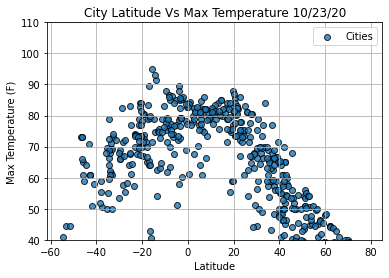

In [179]:
import time
plt.scatter(lats, max_temps, alpha=0.8, edgecolor="Black", linewidths=1, marker="o", label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(40,110)
plt.title(f"City Latitude Vs Max Temperature " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()


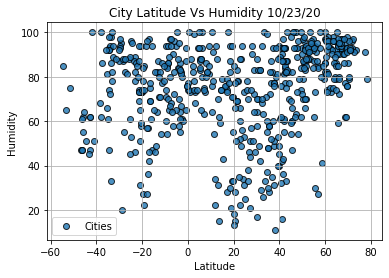

In [180]:
# Scatter plot for latitide vs humidity
plt.scatter(lats, humidity, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude Vs Humidity " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


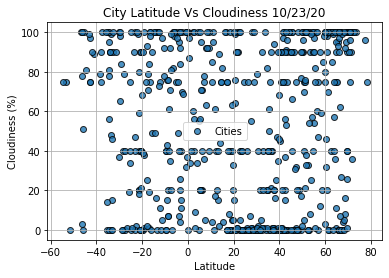

In [181]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, cloudiness, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude Vs Cloudiness " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

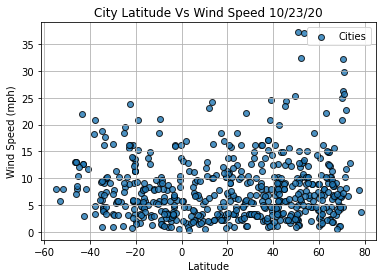

In [182]:
# Plot Latitude vs Cloudiness
plt.scatter(lats, wind_speed, marker="o", alpha=0.8, edgecolor="black", linewidths=1, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude Vs Wind Speed " +  time.strftime("%x"))
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [183]:
from scipy.stats import linregress
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
(slope, intercept, r_value, p_value, std_err)

(-0.4297720170428333,
 67.61599194836388,
 -0.6896857440505959,
 4.130258885188876e-81,
 0.01899989353232038)

In [184]:
# Get the equation of the line.
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)
print(f"p value is {p_value:.2f}")

y =-0.43x +67.62
p value is 0.00


In [185]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(slope*lat) + intercept for lat in lats]
regress_values

[67.66756459040903,
 55.139710293610435,
 49.30770402233918,
 49.5225900308606,
 45.83514612463309,
 90.45837465419048,
 46.926767047921885,
 39.740978922965716,
 85.26672868831305,
 51.43507550670121,
 76.73145642984238,
 37.76832536473911,
 91.16749848231115,
 39.453031671547016,
 82.09930892270737,
 41.434280670114475,
 82.05203400083266,
 36.0234509755452,
 44.61889131640187,
 77.55232098239419,
 65.29092533616216,
 45.7749780422471,
 58.805665598985804,
 41.82967092579389,
 55.98206344701438,
 73.5038685818507,
 76.72715870967195,
 38.069165776669095,
 66.29659185604238,
 58.12662581205812,
 61.21238889442567,
 45.826550684292236,
 52.445039746751874,
 62.20945997396504,
 46.286406742528065,
 76.3102798531404,
 83.78401522951528,
 78.27004025085571,
 50.25320245983342,
 71.82775771538365,
 82.07782032185523,
 39.41864991018359,
 78.69981226789855,
 45.07444965446727,
 71.66874206907781,
 39.25103882353689,
 39.07913001671975,
 62.88849976089272,
 79.88598303493677,
 37.78121852525

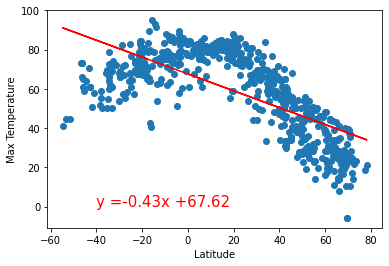

In [186]:
# Create a scatter plot of the x and y values.
plt.scatter(lats, max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq,(-40,0), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

In [187]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression (x_values, y_values,title,y_label,text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    regress_values = [(slope*x) + intercept for x in x_values]
    # Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

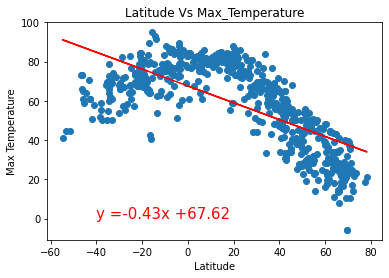

In [188]:
plot_linear_regression(lats,max_temps,"Latitude Vs Max_Temperature", "Max Temperature", (-40,0))

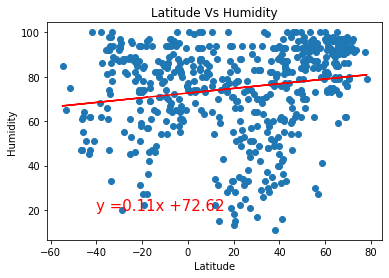

In [189]:
plot_linear_regression(lats,humidity,"Latitude Vs Humidity", "Humidity", (-40, 20))

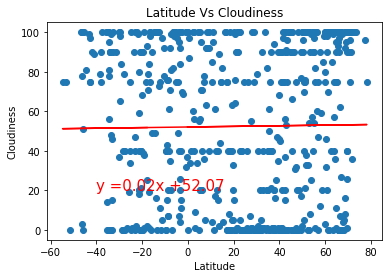

In [190]:
plot_linear_regression(lats,cloudiness,"Latitude Vs Cloudiness", "Cloudiness", (-40, 20))

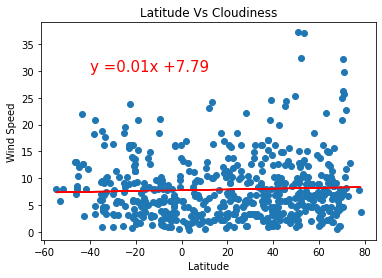

In [191]:
plot_linear_regression(lats,wind_speed,"Latitude Vs Cloudiness", "Wind Speed", (-40, 30))

In [192]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mazagao,BR,2020-10-24 01:43:23,-0.12,-51.29,84.20,74,0,13.87
1,Jalu,LY,2020-10-24 01:43:23,29.03,21.55,63.07,83,0,10.49
2,Albany,US,2020-10-24 01:43:24,42.60,-73.97,64.99,84,15,7.83
3,Jamestown,US,2020-10-24 01:43:24,42.10,-79.24,70.00,60,75,12.75
4,Severo-Kurilsk,RU,2020-10-24 01:43:24,50.68,156.12,43.57,86,100,37.18
5,Punta Arenas,CL,2020-10-24 01:43:24,-53.15,-70.92,44.60,65,75,5.82
6,Avdiyivka,UA,2020-10-24 01:43:25,48.14,37.74,54.34,96,100,8.66
7,College,US,2020-10-24 01:43:25,64.86,-147.80,28.00,79,75,2.48
8,Burnie,AU,2020-10-24 01:38:28,-41.07,145.92,57.88,51,89,11.81
9,Longkou,CN,2020-10-24 01:43:25,37.65,120.33,57.25,49,0,15.30


In [193]:
index13 = city_data_df.loc[13]
index13.dtypes

dtype('O')

In [194]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Jalu,LY,2020-10-24 01:43:23,29.03,21.55,63.07,83,0,10.49
2,Albany,US,2020-10-24 01:43:24,42.60,-73.97,64.99,84,15,7.83
3,Jamestown,US,2020-10-24 01:43:24,42.10,-79.24,70.00,60,75,12.75
4,Severo-Kurilsk,RU,2020-10-24 01:43:24,50.68,156.12,43.57,86,100,37.18
6,Avdiyivka,UA,2020-10-24 01:43:25,48.14,37.74,54.34,96,100,8.66


In [195]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mazagao,BR,2020-10-24 01:43:23,-0.12,-51.29,84.20,74,0,13.87
5,Punta Arenas,CL,2020-10-24 01:43:24,-53.15,-70.92,44.60,65,75,5.82
8,Burnie,AU,2020-10-24 01:38:28,-41.07,145.92,57.88,51,89,11.81
10,Avarua,CK,2020-10-24 01:43:25,-21.21,-159.78,77.00,69,59,16.11
12,Ushuaia,AR,2020-10-24 01:40:23,-54.80,-68.30,41.00,85,75,8.05


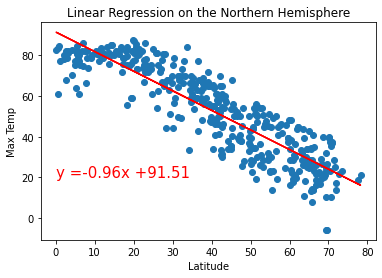

In [208]:
# Perform linear regression on Souther hemispear
northern_lat = northern_hemi_df["Lat"]
northern_temp = northern_hemi_df["Max Temp"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_temp, "Linear Regression on the Northern Hemisphere", "Max Temp", (0,20))

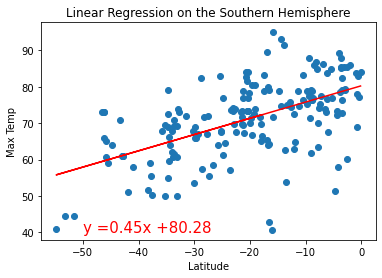

In [211]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_temp = southern_hemi_df["Max Temp"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_temp, "Linear Regression on the Southern Hemisphere", "Max Temp", (-50,40))

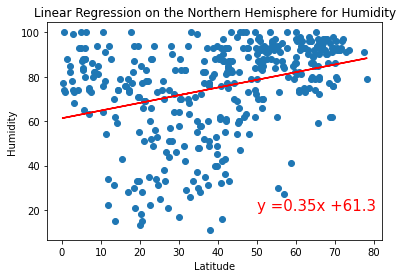

In [216]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_humid = northern_hemi_df["Humidity"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_humid, "Linear Regression on the Northern Hemisphere for" +
                       " Humidity", "Humidity", (50,20))

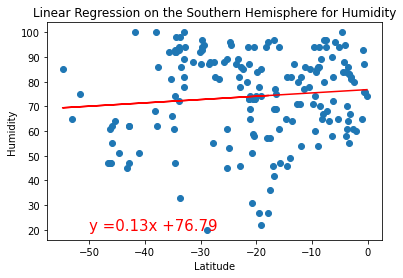

In [218]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_humid = southern_hemi_df["Humidity"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_humid, "Linear Regression on the Southern Hemisphere for Humidity", "Humidity", (-50,20))

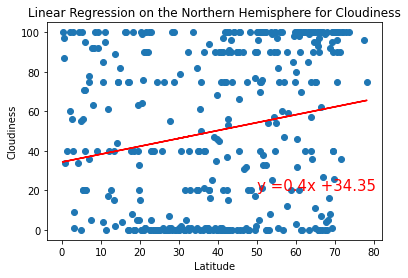

In [219]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_cloudiness, "Linear Regression on the Northern Hemisphere for" +
                       " Cloudiness", "Cloudiness", (50,20))

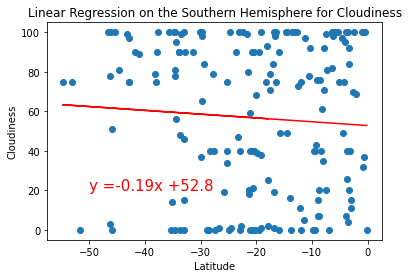

In [220]:
# Perform linear regression on Southern hemispear
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_cloudiness, "Linear Regression on the Southern Hemisphere for Cloudiness", "Cloudiness", (-50,20))

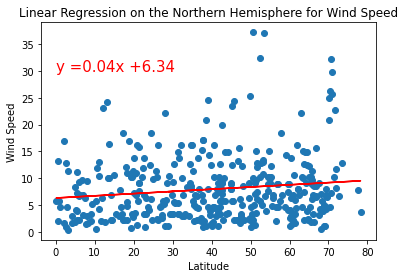

In [223]:
# Perform linear regression on Southern hemispear
northern_lat = northern_hemi_df["Lat"]
northern_windspeed = northern_hemi_df["Wind Speed"]
# Linear regression on the Northern Hemisphere
plot_linear_regression(northern_lat, northern_windspeed, "Linear Regression on the Northern Hemisphere for" +
                       " Wind Speed", "Wind Speed", (0,30))

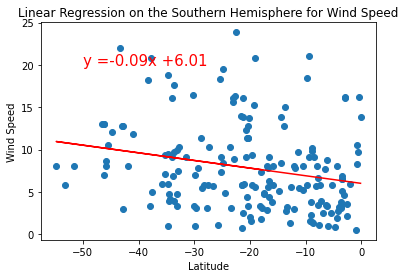

In [221]:
# Perform linear regression on Souther hemispear
southern_lat = southern_hemi_df["Lat"]
southern_windspeed = southern_hemi_df["Wind Speed"]
# Linear regression on the Southern Hemisphere
plot_linear_regression(southern_lat, southern_windspeed, "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed", (-50,20))